# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0382 Азаров Максим и Шангичев Василий. Вариант №13.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения


__Линейную комбинацию дискретных гармонических сигналов__:
$$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)$$

где $x_i(k)=B_i\sin(\hatω_ik), \quad  i = 1, 2, 3$

\\
**Дискретный прямоугольный импульс**
$$s_1(k)= \begin{cases}U, & n_0 \le k \le n_0+n_{imp}-1\\0, & иначе\end{cases}$$

**Среднее значение дискретного сигнала**:
$$M = \frac{\sum_{k=0}^{N}x(k)}{N}$$

**Энергия дискретного сигнала**: $$E = \sum_{k=0}^{N}|x(k)|^2$$

**Средняя мощность дискретного сигнала**:
$$P = \frac{E}{N} = \frac{\sum_{n=0}^{N}|x(k)|^2}{N}$$


## Выполнение работы

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Константы
import math

Nb = 13
N = 30 + Nb % 5
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = math.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = math.pi / (4 + Nb % 5)
w2 = math.pi / (8 + Nb % 5)
w3 = math.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5



### 1. Смоделировать дискретный прямоугольный импульс:

$$s_1(k)= \begin{cases}U, & n_0 \le k \le n_0+n_{imp}-1\\0, & иначе\end{cases}$$

на основе дискретного единичного скачка $σ_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N-1]$. Пояснить, как выполняется моделирование импульса.

**Решение**

$s_1(k) = U * (\sigma_d(k - n_0) - \sigma_d(k - n_0 - n_{imp}))$

<ipython-input-9-389f9d10b461>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, s_1(k), use_line_collection=True)


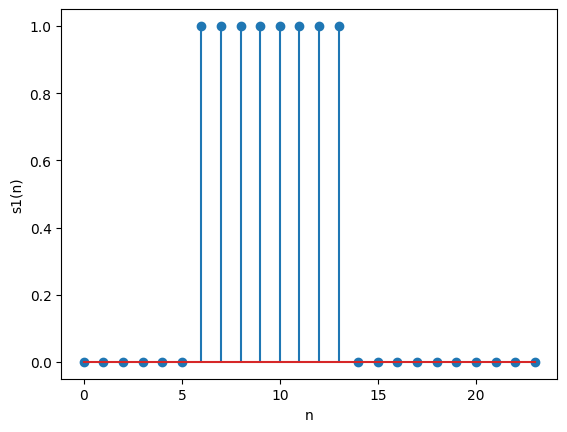

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigma_d = lambda k: int(k >= 0)
sigma_d = np.vectorize(sigma_d)

s_1 = lambda k: sigma_d(k - n0) - sigma_d(k - n0 - n_imp)
s_1 = np.vectorize(s_1)

k = np.arange(0, n0 + n_imp + 10)

plt.stem(k, s_1(k), use_line_collection=True)
plt.xlabel('n')
plt.ylabel('s1(n)')
plt.show()

### 2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

Смоделировать линейную комбинацию дискретных гармонических сигналов $$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)$$

где $x_i(k)=B_i\sin(\hatω_ik), \quad  i = 1, 2, 3$

с выводом графиков последовательностей $x_i(k), s_2(k)$ на интервале времени $ n \in [0, 5N - 1] $. Вычислить среднее значение (идентификатор ''mean_s2''), энергию (идентификатор ''E'') и среднюю мощность последовательности $ s_2(k) $ (идентификатор ''P'').

Пояснить:
1. операции при моделировании линейной комбинации сигналов $s_2(k)$
2. как определяют указанные характеристики.

<ipython-input-14-ea7cf7d7926f>:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x_i(k, 1), use_line_collection=True)
<ipython-input-14-ea7cf7d7926f>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x_i(k,2), use_line_collection=True)
<ipython-input-14-ea7cf7d7926f>:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, x_i(k,3), us

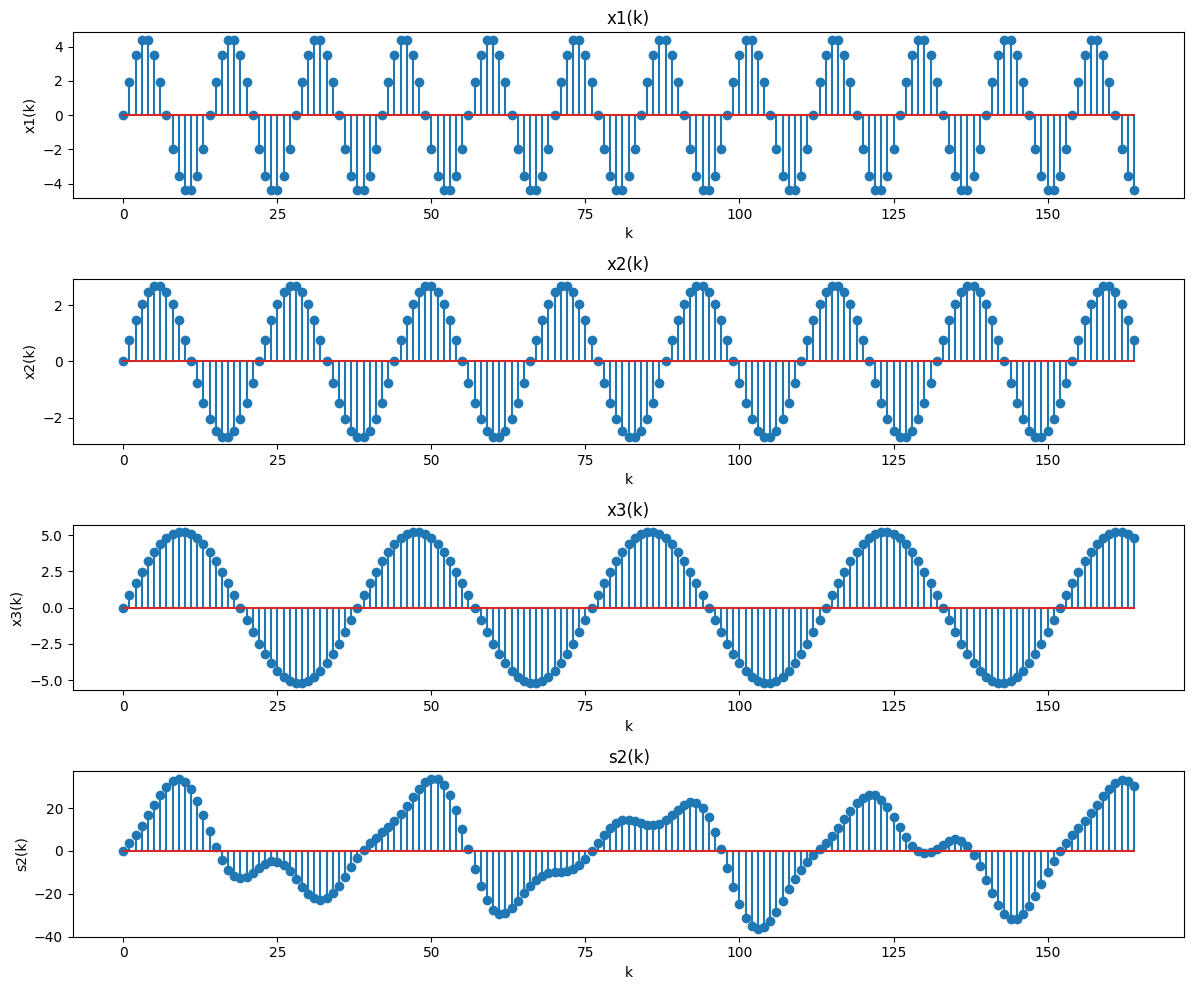

mean_s2: 1.5678183541399593
E: 57255.466663179
P: 347.0028282616909


In [ ]:
B = [B1, B2, B3]
w = [w1, w2, w3]
a = [a1, a2, a3]

def x_i(k, i):
    return B[i-1] * np.sin(w[i-1] * k)

def s_2(k):
    return a[0] * x_i(k, 1) + a[1] * x_i(k, 2) + a[2] * x_i(k, 3)

vs_2 = np.vectorize(s_2)

# код для графиков
k = np.arange(5*N)

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.stem(k, x_i(k, 1), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('x1(k)')
plt.title('x1(k)')

plt.subplot(4, 1, 2)
plt.stem(k, x_i(k,2), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('x2(k)')
plt.title('x2(k)')

plt.subplot(4, 1, 3)
plt.stem(k, x_i(k,3), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('x3(k)')
plt.title('x3(k)')

plt.subplot(4, 1, 4)
plt.stem(k, vs_2(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('s2(k)')
plt.title('s2(k)')

plt.tight_layout()
plt.show()


mean_s2 = np.mean(s_2(k))
print("mean_s2:", mean_s2)

E = np.sum(s_2(k)**2)
print("E:", E)

P = E / len(k)
print("P:", P)


1. **Операции при моделировании линейной комбинации сигналов $s_2(k)$**: \\
  Для каждой точки k , мы считаем гармонический сигнал $x_i(k)$ , умножаем на соответствующую константу $a_i$ и суммируем полученные значения.
  
2. **Как определяют указанные характеристики**: \\
  Как указанно в основных теоретических положениях

  **Среднее значение дискретного сигнала**:
  $$M = \frac{\sum_{k=0}^{N}x(k)}{N}$$

  **Энергия дискретного сигнала**: $$E = \sum_{k=0}^{N}|x(k)|^2$$

  **Средняя мощность дискретного сигнала**:
  $$P = \frac{E}{N} = \frac{\sum_{n=0}^{N}|x(k)|^2}{N}$$

### 3. Вывести график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$

$s(k) = Ccos(\hat{w_0}k)$

с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

$s_m(k) = |a|^kCcos(\hat{w_0}k)$

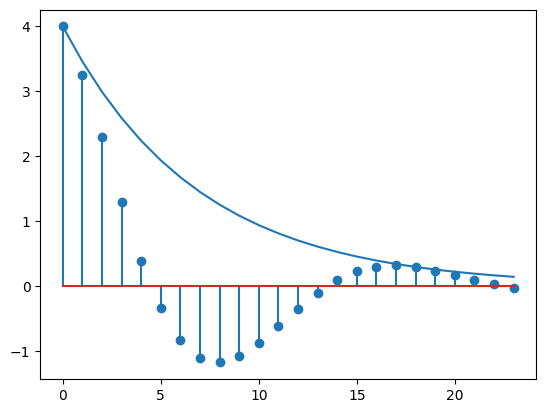

In [ ]:
s_m = lambda k: abs(a) ** k * C * math.cos(w0 * k)
s_m = np.vectorize(s_m)

plt.stem(k, s_m(k))
plt.plot(k, C * abs(a) ** k)

### 4. Вывести график пяти периодов периодической последовательности $s_4(k)$:

Вывести график пяти периодов периодической последовательности  $s_4(k)$
 дискретных прямоугольных импульсов амплитуды  $U$ и длительности
$n_{imp}$
 с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.


\\
**Дискретный прямоугольный импульс**
$$s_1(k)= \begin{cases}U, & n_0 \le k \le n_0+n_{imp}-1\\0, & иначе\end{cases}$$

Тогда,

$$ s_4(k)=\sum_{i=0}^{4} s_1(k-ip),$$

где $p=2n_{imp}$

<ipython-input-19-29eacc86293e>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(k, s_4(k), use_line_collection=True)


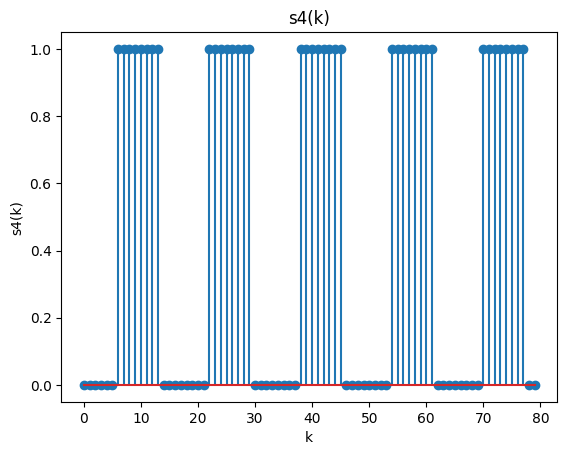

In [ ]:
sigma_d = lambda k: int(k >= 0)
sigma_d = np.vectorize(sigma_d)

s_1 = lambda k: sigma_d(k - n0) - sigma_d(k - n0 - n_imp)
vs_1 = np.vectorize(s_1)

p = 2*n_imp

s_4 = lambda k: sum( [s_1(k-i*p) for i in range(5)] )
vs_4 = np.vectorize(s_4)

k = np.arange(5*p)

plt.stem(k, s_4(k), use_line_collection=True)
plt.xlabel('k')
plt.ylabel('s4(k)')
plt.title('s4(k)')
plt.show()

**Операции при моделировании периодической последовательности:**
- чтобы получить получить переодических 5 импульсов  $s_1(k)$ , мы суммируем $s_1(k)$ 5 раз с разным смещением. Чтобы получить смещение вычитаем из аргумента $i*p$ , где $p=2n_{imp}$, а $i$ - индекс $s_i$

## Выводы

В ходе выполнения практической работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов, были получены навыки владения программными средствами моделирования гармонических сигналов. Различные дискретные сигналы были представлены в виде линейной комбинации более простых, что может быть полезным в решении многих практических задач. Также были измерены такие базовые характеристики сигнала, как среднее значение, энергия и средняя мощность. Также было представлено графическое изображение каждого графика, что позволило получить интуитивное представление о сущности каждой из характеристик. Таким образом, выполнение данной работы позволило развить навыки представления дискретных сигналов, их визуализации и математического описания.